# **Hypotheses**

### Objectives

* The objective is to understand the DataFrame in terms of its data regarding the mean,median, and standard deviation. These 3 aspects will give an understanding as to the middle value, average value, and deviation away from the mean or average value. Therefore, the spread of the data is in the dataset. If the standard deviation low then the data is likely to be clusterd, if it is high then there is likely to wide variability.

* The hypotheses used are based on assumptions and these 3 will be evaluated.

* Probability is concerned with number of outcomes and the likelihood of them happening.

#### Inputs

* I will use the ecommerce_transactions_cleaned.csv dataset.

#### Outputs

* The outputs will be from Chi, Welch's t-tests, and box plot visualisations.

#### Additional Comments

* These principles are important and form the foundation of data analysis because they provide the data analyst with insights, compare distributions and consistency, enable probablistic reasoning 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\global-store\\online_store\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\global-store\\online_store'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency



In [10]:
hypoth_df = pd.read_csv('../online_store/data/cleaned_data/ecommerce_transactions_cleaned.csv') # Load the cleaned dataset
hypoth_df.head() # Display the first few rows of the dataset

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month,Day
0,33554,Isabella Lewis,24,Japan,Toys,579.51,Cash on Delivery,2024-01-16,2024,1,16
1,9428,Elijah Rodriguez,52,Germany,Electronics,78.18,PayPal,2023-04-19,2023,4,19
2,200,Ava Hall,62,UK,Toys,713.08,Debit Card,2024-03-05,2024,3,5
3,12448,Ava Allen,63,Brazil,Grocery,474.14,Credit Card,2024-12-01,2024,12,1
4,39490,Emma Lewis,52,USA,Home & Kitchen,266.15,Debit Card,2024-01-19,2024,1,19


##### Hypotheses 1

* Is the total purchase amount higher between March and August compared to November in the USA?

H₀ (null): Total purchase amount from March–August in the USA is equal to or less than that in November.

H₁ (alt): Total purchase amount from March–August in the USA is greater than in November.



In [11]:
hypoth_df['Transaction_Date'] = pd.to_datetime(hypoth_df['Transaction_Date'])

hypoth_df['Month'] = hypoth_df['Transaction_Date'].dt.month

# Filter for USA only
df_usa = hypoth_df[hypoth_df['Country'] == 'USA']

# Group A: March to August
group_a = df_usa[df_usa['Month'].between(3, 8)]['Purchase_Amount']

# Group B: November
group_b = df_usa[df_usa['Month'] == 11]['Purchase_Amount']

# Run one-tailed t-test (greater: is A > B?)
t_stat, p_val = ttest_ind(group_a, group_b, alternative='greater')

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print(" Statistically significant: March–August purchase amounts are higher than November.")
else:
    print("Not statistically significant: No evidence that March–August is higher than November.")


T-statistic: -0.016
P-value: 0.5063
Not statistically significant: No evidence that March–August is higher than November.


#### The output from the test shows that there is no real difference between the time periods, so trade is consistent for this business.

C:\Users\rayaf\AppData\Local\Temp\ipykernel_12792\1161248846.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_a, group_b], labels=['Mar–Aug', 'Nov'], patch_artist=True,


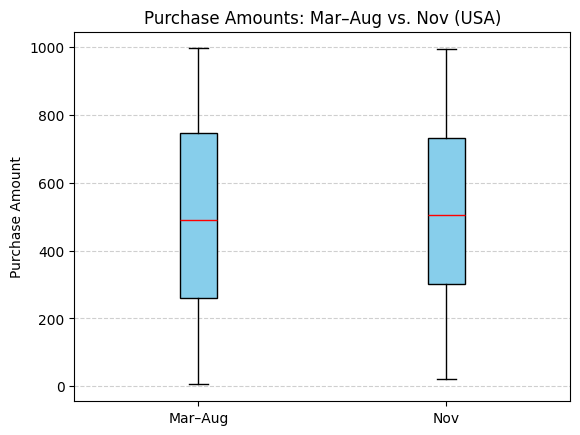

In [12]:
plt.boxplot([group_a, group_b], labels=['Mar–Aug', 'Nov'], patch_artist=True,
            boxprops=dict(facecolor='skyblue'), medianprops=dict(color='red'))

plt.ylabel("Purchase Amount")
plt.title("Purchase Amounts: Mar–Aug vs. Nov (USA)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()
# Hypothesis: The Sports category generates more sales than the Home & Kitchen category.

#### The box plot above further underlines this and the whiskers length are about the same.

##### Hypotheses 2


* Are Credit Card payments used significantly more than COD by customers?


H₀ (null): Payment methods are used equally — no preference observed.

H₁ (alt): Credit Card payments are used more frequently than COD.


In [13]:
payment_counts = hypoth_df['Payment_Method'].value_counts()

# Focus on just Credit Card and COD
payment_subset = payment_counts[['Credit Card', 'Cash on Delivery']]

# Create contingency table
observed = [[payment_subset['Credit Card'], payment_subset['Cash on Delivery']]]

# Expected: equal distribution (if no preference)
expected = [[sum(payment_subset)/2, sum(payment_subset)/2]]

# Chi-square test
chi2, p, dof, _ = chi2_contingency([observed[0], expected[0]])

print(f"Chi-square stat: {chi2:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Significant: Credit Card usage is not equal to COD — potential preference indicated.")
else:
    print(" Not significant: No evidence of usage preference between Credit Card and COD.")


Chi-square stat: 0.172
P-value: 0.6780
 Not significant: No evidence of usage preference between Credit Card and COD.


#### The output above shows that there is no real preference between the two payment methods. This may also indicate that a number of customers are trusted and the bsuiness relies on this form of income stream.

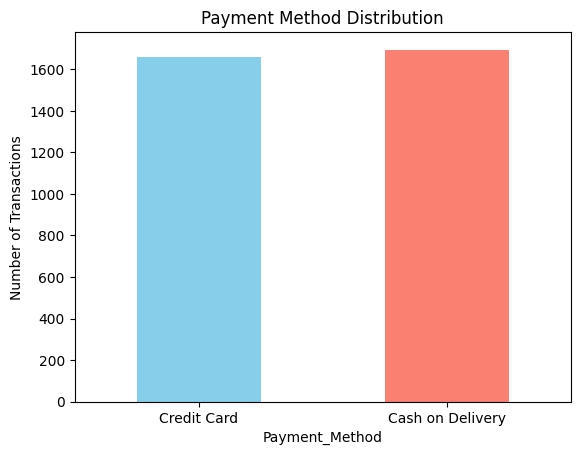

In [14]:
payment_subset.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Payment Method Distribution")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()
# The output from the test shows that there is no real difference between the time periods, so trade is consistent for this business.

#### The visual above further underlines this aspect, so both electronic and traditional methods of payment result in sales revenue generation.

##### Hypotheses 3

* The Sports category generates more sales than the Home & Kitchen category.

Hypothesis:
Null hypothesis (H0): Mean sales in Sports ≤ Mean sales in Home & Kitchen

Alternative hypothesis (H1): Mean sales in Sports > Mean sales in Home & Kitchen
